In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [5]:
movies = pd.read_csv('data//movielens//movies.csv')
print('movies.shape : ',movies.shape)
movies.head()

movies.shape :  (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('data//movielens//ratings.csv')
print('ratings.shape : ',ratings.shape)
ratings.head()

ratings.shape :  (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
data =  movies.merge(ratings,how = 'right',on =['movieId'])

In [10]:
data.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931
...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091
100833,168250,Get Out (2017),Horror,610,5.0,1494273047
100834,168252,Logan (2017),Action|Sci-Fi,610,5.0,1493846352


### Top 10 most watched movie

<AxesSubplot:>

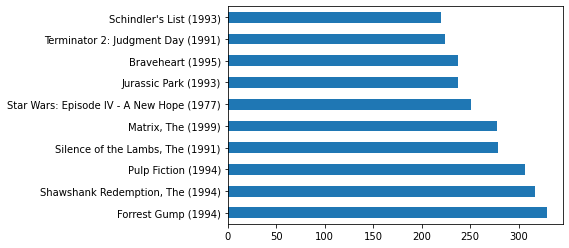

In [15]:
data.title.value_counts().head(10).plot(kind ='barh')

In [18]:
import re

In [40]:
def clean_data(df=data):
    df = df.copy()
    pattern =  r'[+-]\d+|\d+'
    df['production_year'] = df['title'].apply(lambda x : re.findall(pattern,x))
    def adjust_production_year(row):
        if len(row.production_year) ==1:
            return row.production_year[0]
        else:
            for token in row.production_year:
                if len(token)==4:
                    return token
    df['production_year'] = df.apply(adjust_production_year,axis=1)
    return df
data2 = clean_data(df=data)

In [41]:
data2.head()

,movieId,title,genres,userId,rating,timestamp,production_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247,1995
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224,1995
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815,1995
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,1995


In [77]:
production_year_df = data2.groupby('production_year')['rating'].agg(['count','mean']).sort_values(by='count',ascending=False)

In [83]:
production_year_df[['count']].sort_values(by = 'production_year')

,count
production_year,
1964,376
1967,381
1968,325
1971,526
1972,366
1973,483
1974,464
1975,636
1976,420


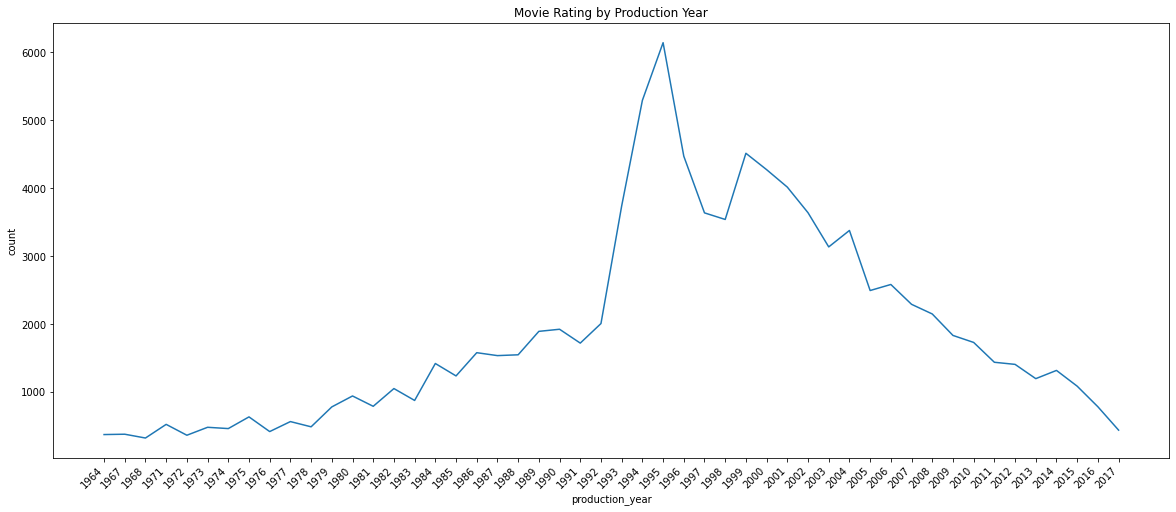

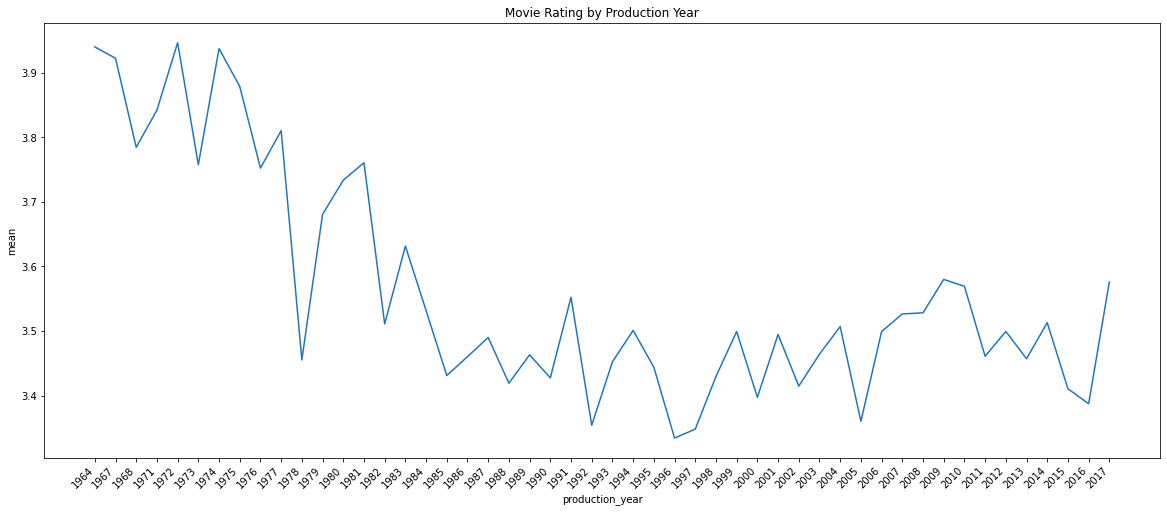

In [84]:
production_year_df = production_year_df.head(50)
plt.figure(figsize=(20,8))
production_year_df_c = production_year_df[['count']].sort_values(by = 'production_year')
sns.lineplot(data =  production_year_df_c , x='production_year' ,y ='count')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
labels = production_year_df_c.index
plt.xticks(np.arange(production_year_df.shape[0]),labels)
plt.title('Movie Rating by Production Year')
plt.show()

production_year_df = production_year_df.head(50)
plt.figure(figsize=(20,8))
production_year_df_m = production_year_df[['mean']].sort_values(by = 'production_year')
sns.lineplot(data =  production_year_df_m , x='production_year' ,y ='mean')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
labels = production_year_df_m.index
plt.xticks(np.arange(production_year_df.shape[0]),labels)
plt.title('Movie Rating by Production Year')
plt.show()

In [87]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931


In [103]:
movie_count = data.groupby('title')['title'].agg(['count']).sort_values(by='count',ascending = False)

In [109]:
movie_count

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
King Solomon's Mines (1950),1
King Solomon's Mines (1937),1
King Ralph (1991),1


### Number of Users

In [113]:
data.userId.nunique()

610

In [121]:
movie_count[movie_count['count']>22].shape

(1131, 1)

In [218]:
movie_count[movie_count['count']>50].shape

(437, 1)

In [106]:
movie_count.describe([0.75,0.7])

,count
count,9719.000000
mean,10.375141
std,22.406220
min,1.000000
50%,3.000000
70%,7.000000
75%,9.000000
max,329.000000


<AxesSubplot:ylabel='Frequency'>

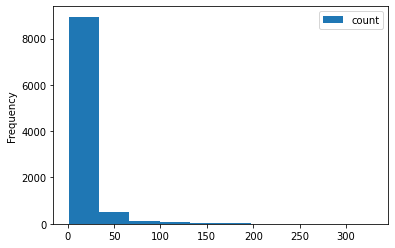

In [108]:
movie_count.plot(kind = 'hist')

In [124]:
data2 = data.merge(movie_count,how='left',on='title')

In [125]:
data2

,movieId,title,genres,userId,rating,timestamp,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247,52
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224,102
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815,203
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,204
...,...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402,6
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091,7
100833,168250,Get Out (2017),Horror,610,5.0,1494273047,15
100834,168252,Logan (2017),Action|Sci-Fi,610,5.0,1493846352,25


In [126]:
movie_matrix_22 = data2[data2['count']>22].pivot_table(index='userId',columns ='title',values='rating')

In [127]:
movie_matrix_22.shape

(610, 1131)

In [131]:
movie_matrix_22[:80]

title   (500) Days of Summer (2009)  10 Things I Hate About You (1999)  \
userId                                                                   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   
5                               NaN                                NaN   
...                             ...                                ...   
76                              NaN                                NaN   
77                              NaN                                NaN   
78                              NaN                                NaN   
79                              NaN                                NaN   
80                              NaN                                NaN   

title   101 Dalmatians (1996)  \
userId                          
1                         NaN   
2                         NaN   
3                         NaN   
4                         NaN   
5                         NaN   
...                       ...   
76                        1.0   
77                        NaN   
78                        NaN   
79                        NaN   
80                        NaN   

title   101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
userId                                                           
1                                                     NaN        
2                                                     NaN        
3                                                     NaN        
4                                                     NaN        
5                                                     NaN        
...                                                   ...        
76                                                    NaN        
77                                                    NaN        
78                                                    NaN        
79                                                    NaN        
80                                                    NaN        

title   12 Angry Men (1957)  13th Warrior, The (1999)  1408 (2007)  \
userId                                                               
1                       NaN                       4.0          NaN   
2                       NaN                       NaN          NaN   
3                       NaN                       NaN          NaN   
4                       5.0                       NaN          NaN   
5                       NaN                       NaN          NaN   
...                     ...                       ...          ...   
76                      NaN                       NaN          NaN   
77                      NaN                       NaN          NaN   
78                      NaN                       NaN          NaN   
79                      NaN                       NaN          NaN   
80                      NaN                       NaN          3.5   

title   2001: A Space Odyssey (1968)  21 Grams (2003)  21 Jump Street (2012)  \
userId                                                                         
1                                NaN              NaN                    NaN   
2                                NaN              NaN                    NaN   
3                                NaN              NaN                    NaN   
4                                NaN              NaN                    NaN   
5                                NaN              NaN                    NaN   
...                              ...              ...                    ...   
76                               NaN              NaN                    NaN   
77                               NaN              NaN                    NaN   
78                               NaN 

In [135]:
(~movie_matrix['American Gangster (2007)'].isna()).sum()

37

In [141]:
movie_count

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
King Solomon's Mines (1950),1
King Solomon's Mines (1937),1
King Ralph (1991),1


In [160]:
def recommendation_with_correlation(matrix , movie ,count_df):
    print(f'Movie Recommendation For {movie}')
    print()
    print('<------------------------------------->') 
    print()
    movie_user_ratings = matrix[movie]
    number_of_viewers = (~matrix[movie].isna()).sum()
    print(f'{number_of_viewers} users for this movie including you')
    print()
    similar_movies = matrix.corrwith(movie_user_ratings)
    corr_similar_movies = pd.DataFrame(similar_movies,columns = ['Correlation'])
    corr_similar_movies.dropna(inplace = True)
    #display(corr_similar_movies)
    corr_similar_movies = pd.merge(corr_similar_movies,count_df,left_index=True,right_index=True)
    corr_similar_movies= corr_similar_movies.sort_values('Correlation',ascending = False)
    print(f"Recommended corr_df for {movie} generated")
    return corr_similar_movies[corr_similar_movies.Correlation>0]
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'American Gangster (2007)',count_df=movie_count)

Movie Recommendation For American Gangster (2007)

<------------------------------------->

37 users for this movie including you

Recommended corr_df for American Gangster (2007) generated


In [161]:
corr_movie

,Correlation,count
title,,
The Falcon and the Snowman (1985),1.000000,5
Friends with Kids (2011),1.000000,3
Black Robe (1991),1.000000,3
"Gods Must Be Crazy, The (1980)",1.000000,28
Gladiator (1992),1.000000,9
...,...,...
Rosemary's Baby (1968),0.008275,32
"Sound of Music, The (1965)",0.007382,64
Batman (1989),0.006080,189


In [167]:
def get_recommendation(corr_df,corr_thresh=0,movie_count=10):
    print('Generating Recomendation')
    print('<------------------------------------->') 
    print()
    out_df = corr_df[(corr_df['Correlation']>corr_thresh) & (corr_df['count']>movie_count)]
    return out_df.sort_values('Correlation',ascending=False).head(10)

In [168]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=10)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
"Gods Must Be Crazy, The (1980)",1.0,28
Harriet the Spy (1996),1.0,11
American Gangster (2007),1.0,37
Solaris (Solyaris) (1972),1.0,11
Wonder Boys (2000),1.0,22
Maleficent (2014),1.0,16
Easy Rider (1969),1.0,29
Midnight in the Garden of Good and Evil (1997),1.0,24
Nell (1994),1.0,40


In [179]:
def search_title(movie):
    return set([ i for i in data.title if movie in i])

In [180]:
search_title(movie='Toy')

{'Babes in Toyland (1934)',
 'Babes in Toyland (1961)',
 'Toy Soldiers (1991)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toy, The (1982)',
 'Toys (1992)'}

In [197]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Toy Story (1995)',count_df=movie_count)

Movie Recommendation For Toy Story (1995)

<------------------------------------->

215 users for this movie including you

Recommended corr_df for Toy Story (1995) generated


In [198]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=50)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
Toy Story (1995),1.000000,215
Toy Story 2 (1999),0.699211,97
Arachnophobia (1990),0.652424,53
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
Erin Brockovich (2000),0.598016,70
Wallace & Gromit: The Wrong Trousers (1993),0.589625,56
Blazing Saddles (1974),0.585892,62


In [186]:
search_title(movie='Star Wars')

{"Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)",
 'Rogue One: A Star Wars Story (2016)',
 'Solo: A Star Wars Story (2018)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Star Wars: Episode II - Attack of the Clones (2002)',
 'Star Wars: Episode III - Revenge of the Sith (2005)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Star Wars: The Clone Wars (2008)',
 'Star Wars: The Last Jedi (2017)',
 'The Star Wars Holiday Special (1978)'}

In [187]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Star Wars: Episode I - The Phantom Menace (1999)',count_df=movie_count)

Movie Recommendation For Star Wars: Episode I - The Phantom Menace (1999)

<------------------------------------->

140 users for this movie including you

Recommended corr_df for Star Wars: Episode I - The Phantom Menace (1999) generated


In [189]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=50)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
Star Wars: Episode I - The Phantom Menace (1999),1.000000,140
Star Wars: Episode II - Attack of the Clones (2002),0.842278,92
Star Wars: Episode III - Revenge of the Sith (2005),0.792450,78
Star Trek (2009),0.656503,59
Mr. Holland's Opus (1995),0.644316,80
"Matrix Revolutions, The (2003)",0.607936,79
"Matrix Reloaded, The (2003)",0.568544,96
Bruce Almighty (2003),0.554062,71
War of the Worlds (2005),0.537792,52


In [190]:
search_title(movie='Shawshank')

{'Shawshank Redemption, The (1994)'}

In [199]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Shawshank Redemption, The (1994)',count_df=movie_count)

Movie Recommendation For Shawshank Redemption, The (1994)

<------------------------------------->

317 users for this movie including you

Recommended corr_df for Shawshank Redemption, The (1994) generated


In [201]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=50)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Rear Window (1954),0.545149,84
My Cousin Vinny (1992),0.523016,59
Bad Boys (1995),0.516762,51
City of God (Cidade de Deus) (2002),0.486670,75
"Christmas Story, A (1983)",0.475801,55
"Lock, Stock & Two Smoking Barrels (1998)",0.472598,67
Lady and the Tramp (1955),0.468373,55
Grumpier Old Men (1995),0.466380,52


In [202]:
search_title(movie='Heat')

{'Body Heat (1981)',
 'City Heat (1984)',
 'Dead Heat (1988)',
 'Heat (1995)',
 'Heat, The (2013)',
 'Heathers (1989)',
 'In the Heat of the Night (1967)',
 'Red Heat (1988)',
 'White Heat (1949)'}

In [203]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Heat (1995)',count_df=movie_count)

Movie Recommendation For Heat (1995)

<------------------------------------->

102 users for this movie including you

Recommended corr_df for Heat (1995) generated


In [204]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=50)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
Heat (1995),1.000000,102
Philadelphia (1993),0.686060,66
Slumdog Millionaire (2008),0.662325,71
Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.651800,133
"Bourne Ultimatum, The (2007)",0.611546,81
Aliens (1986),0.597448,126
I Am Legend (2007),0.574709,62
Inception (2010),0.565437,143
Army of Darkness (1993),0.550348,51


In [205]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Inception (2010)',count_df=movie_count)

Movie Recommendation For Inception (2010)

<------------------------------------->

143 users for this movie including you

Recommended corr_df for Inception (2010) generated


In [207]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=100)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
Inception (2010),1.000000,143
Interview with the Vampire: The Vampire Chronicles (1994),0.789059,109
Dances with Wolves (1990),0.734847,164
"Firm, The (1993)",0.722633,101
Saving Private Ryan (1998),0.700970,188
Full Metal Jacket (1987),0.607265,102
Ocean's Eleven (2001),0.581871,119
Heat (1995),0.565437,102
Braveheart (1995),0.555414,237


In [217]:
search_title(movie='Saving')

{'Saving Christmas (2014)',
 'Saving Face (2004)',
 'Saving Grace (2000)',
 'Saving Mr. Banks (2013)',
 'Saving Private Ryan (1998)',
 'Saving Santa (2013)',
 'Saving Silverman (Evil Woman) (2001)'}

In [209]:
corr_movie = recommendation_with_correlation(matrix=movie_matrix , movie= 'Saving Private Ryan (1998)',count_df=movie_count)

Movie Recommendation For Saving Private Ryan (1998)

<------------------------------------->

188 users for this movie including you

Recommended corr_df for Saving Private Ryan (1998) generated


In [211]:
get_recommendation(corr_df=corr_movie,corr_thresh=0.3,movie_count=50)

Generating Recomendation
<------------------------------------->



,Correlation,count
title,,
Saving Private Ryan (1998),1.000000,188
Philadelphia (1993),0.721538,66
Inception (2010),0.700970,143
"Cable Guy, The (1996)",0.649435,54
"Firm, The (1993)",0.646932,101
I Am Legend (2007),0.625195,62
Grumpier Old Men (1995),0.617357,52
Slumdog Millionaire (2008),0.606126,71
American Psycho (2000),0.563259,59
